<a href="https://colab.research.google.com/github/Captmoonshot/DS-Sprint-02-Storytelling-With-Data/blob/master/LS_DS_124_Sequence_your_narrative.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

_Lambda School Data Science_

# Sequence your narrative

Create a sequence of visualizations inspired by [Hans Rosling's 200 Countries, 200 Years, 4 Minutes](https://www.youtube.com/watch?v=jbkSRLYSojo).

Using this [data from Gapminder](https://github.com/open-numbers/ddf--gapminder--systema_globalis/):
- https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--income_per_person_gdppercapita_ppp_inflation_adjusted--by--geo--time.csv
- https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--life_expectancy_years--by--geo--time.csv
- https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--entities--geo--country.csv
- https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--concepts.csv

### Stretch goals
- [ipywidgets](https://github.com/jupyter-widgets/ipywidgets)
- [Matplotlib animation](https://matplotlib.org/examples/animation/index.html)
- [Connected scatter plots](http://www.thefunctionalart.com/2012/09/in-praise-of-connected-scatter-plots.html)
- [Idyll markup language](https://idyll-lang.org/) for "scrollytelling"

Variables --> Visual Encodings
- Income --> X
- Lifespan --> y
- Population -->Size
- Region --> Color
- Year --> time / animation frame (alternative: small multiples)
- Country --> annotation

Qualitative --> Verbal
- Editorial / Contextual explanation --> audio narration (alternative: text)

columns   = [ Year, Country, Region, Income, Lifespan, Population]

In [42]:
!pip install --upgrade seaborn

Requirement already up-to-date: seaborn in /usr/local/lib/python3.6/dist-packages (0.9.0)


In [2]:
# Restart runtime

import seaborn as sns
sns.__version__

'0.9.0'

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
income = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--income_per_person_gdppercapita_ppp_inflation_adjusted--by--geo--time.csv')



In [0]:
life_span = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--life_expectancy_years--by--geo--time.csv')

In [0]:
population = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_total--by--geo--time.csv')

In [0]:
entities = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--entities--geo--country.csv')

In [0]:
concepts = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--concepts.csv')

In [9]:
income.shape, life_span.shape, population.shape, entities.shape, concepts.shape

((44268, 3), (44370, 3), (51939, 3), (273, 33), (590, 16))

In [10]:
income.head()

,geo,time,income_per_person_gdppercapita_ppp_inflation_adjusted
0,abw,1800,833
1,abw,1801,833
2,abw,1802,833
3,abw,1803,833
4,abw,1804,833


In [11]:
life_span.head()

,geo,time,life_expectancy_years
0,abw,1800,34.42
1,abw,1801,34.42
2,abw,1802,34.42
3,abw,1803,34.42
4,abw,1804,34.42


In [12]:
population.head()

,geo,time,population_total
0,abw,1800,19286
1,abw,1801,19286
2,abw,1802,19286
3,abw,1803,19286
4,abw,1804,19286


In [13]:
entities.head()

,country,alt_5,alternative_1,alternative_2,alternative_3,alternative_4_cdiac,arb1,arb2,arb3,arb4,...,latitude,longitude,main_religion_2008,name,pandg,un_state,unicode_region_subtag,upper_case_name,world_4region,world_6region
0,abkh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Abkhazia,NaN,False,NaN,NaN,europe,europe_central_asia
1,abw,NaN,NaN,NaN,NaN,Aruba,NaN,NaN,NaN,NaN,...,12.50000,-69.96667,christian,Aruba,NaN,False,AW,ARUBA,americas,america
2,afg,NaN,Islamic Republic of Afghanistan,NaN,NaN,Afghanistan,NaN,NaN,NaN,NaN,...,33.00000,66.00000,muslim,Afghanistan,AFGHANISTAN,True,AF,AFGHANISTAN,asia,south_asia
3,ago,NaN,NaN,NaN,NaN,Angola,NaN,NaN,NaN,NaN,...,-12.50000,18.50000,christian,Angola,ANGOLA,True,AO,ANGOLA,africa,sub_saharan_africa
4,aia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,18.21667,-63.05000,christian,Anguilla,NaN,False,AI,ANGUILLA,americas,america


In [14]:
# Data Dictionary

concepts.head()

,concept,color,concept_type,description,description_long,domain,drill_up,indicator_url,name,name_catalog,name_short,scales,source,source_long,source_url,tags
0,adults_with_hiv_percent_age_15_49,NaN,measure,The estimated percentage of adults aged 15 to ...,NaN,NaN,NaN,NaN,"Adults with HIV (%, age 15-49)","Adults with HIV (%, age 15-49)",Adults with HIV,"[""log"", ""linear""]",NaN,NaN,http://www.gapminder.org/gapminder-world/docum...,hiv
1,age_at_1st_marriage_women,NaN,measure,"The mean age, in years, of first marriage for ...",NaN,NaN,NaN,NaN,Age at 1st marriage (women),Age at 1st marriage (women),Age at 1st marriage,"[""linear"", ""log""]",NaN,NaN,http://spreadsheets.google.com/pub?key=t4eF8H_...,population
2,aged_15_24_employment_rate_percent,NaN,measure,"Percentage of total population, age group 15-2...",NaN,NaN,NaN,NaN,Aged 15-24 employment rate (%),Aged 15-24,Employment rate (%),"[""linear"", ""log""]",NaN,NaN,http://ilo.org/legacy/english/global-reports/k...,employment_rate
3,aged_15_24_unemployment_rate_percent,NaN,measure,"Percentage of total population, age group 15-2...",NaN,NaN,NaN,NaN,Aged 15-24 unemployment rate (%),Aged 15-24,Unemployment rate (%),"[""linear"", ""log""]",NaN,NaN,http://ilo.org/legacy/english/global-reports/k...,unemployment
4,aged_15_64_labour_force_participation_rate_per...,NaN,measure,"For age group 15-64, percentage of all labour ...",NaN,NaN,NaN,NaN,Aged 15-64 labour force participation rate (%),Aged 15-64,Labour force participation rate (%),"[""linear"", ""log""]",NaN,NaN,http://ilo.org/legacy/english/global-reports/k...,labour_force_participation


In [15]:
income.shape, life_span.shape, population.shape, entities.shape, concepts.shape

((44268, 3), (44370, 3), (51939, 3), (273, 33), (590, 16))

**Merge DATA**

In [16]:
# Merge the Data

help(pd.merge)

Help on function merge in module pandas.core.reshape.merge:

merge(left, right, how='inner', on=None, left_on=None, right_on=None, left_index=False, right_index=False, sort=False, suffixes=('_x', '_y'), copy=True, indicator=False, validate=None)
    Merge DataFrame objects by performing a database-style join operation by
    columns or indexes.
    
    If joining columns on columns, the DataFrame indexes *will be
    ignored*. Otherwise if joining indexes on indexes or indexes on a column or
    columns, the index will be passed on.
    
    Parameters
    ----------
    left : DataFrame
    right : DataFrame
    how : {'left', 'right', 'outer', 'inner'}, default 'inner'
        * left: use only keys from left frame, similar to a SQL left outer join;
          preserve key order
        * right: use only keys from right frame, similar to a SQL right outer join;
          preserve key order
        * outer: use union of keys from both frames, similar to a SQL full outer
          join;

In [0]:
df = pd.merge(income, life_span)

In [18]:
income.shape, life_span.shape, df.shape

((44268, 3), (44370, 3), (41790, 4))

In [19]:
df.head()

# InnerJoin: Only keeping rows with same keys, hence different number of rows

,geo,time,income_per_person_gdppercapita_ppp_inflation_adjusted,life_expectancy_years
0,abw,1800,833,34.42
1,abw,1801,833,34.42
2,abw,1802,833,34.42
3,abw,1803,833,34.42
4,abw,1804,833,34.42


In [20]:
entities.head()

,country,alt_5,alternative_1,alternative_2,alternative_3,alternative_4_cdiac,arb1,arb2,arb3,arb4,...,latitude,longitude,main_religion_2008,name,pandg,un_state,unicode_region_subtag,upper_case_name,world_4region,world_6region
0,abkh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Abkhazia,NaN,False,NaN,NaN,europe,europe_central_asia
1,abw,NaN,NaN,NaN,NaN,Aruba,NaN,NaN,NaN,NaN,...,12.50000,-69.96667,christian,Aruba,NaN,False,AW,ARUBA,americas,america
2,afg,NaN,Islamic Republic of Afghanistan,NaN,NaN,Afghanistan,NaN,NaN,NaN,NaN,...,33.00000,66.00000,muslim,Afghanistan,AFGHANISTAN,True,AF,AFGHANISTAN,asia,south_asia
3,ago,NaN,NaN,NaN,NaN,Angola,NaN,NaN,NaN,NaN,...,-12.50000,18.50000,christian,Angola,ANGOLA,True,AO,ANGOLA,africa,sub_saharan_africa
4,aia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,18.21667,-63.05000,christian,Anguilla,NaN,False,AI,ANGUILLA,americas,america


In [21]:
entities[entities.country=='abw'].T

,1
country,abw
alt_5,NaN
alternative_1,NaN
alternative_2,NaN
alternative_3,NaN
alternative_4_cdiac,Aruba
arb1,NaN
arb2,NaN
arb3,NaN
arb4,NaN


In [22]:
entities.world_4region.value_counts()

asia        80
europe      73
africa      61
americas    57
Name: world_4region, dtype: int64

In [23]:
entities.world_6region.value_counts()

europe_central_asia         77
america                     53
sub_saharan_africa          53
east_asia_pacific           46
middle_east_north_africa    23
south_asia                   8
Name: world_6region, dtype: int64

In [24]:
variables = ['country', 'name', 'world_6region']

entities[variables].head()

,country,name,world_6region
0,abkh,Abkhazia,europe_central_asia
1,abw,Aruba,america
2,afg,Afghanistan,south_asia
3,ago,Angola,sub_saharan_africa
4,aia,Anguilla,america


In [25]:
df.head()

,geo,time,income_per_person_gdppercapita_ppp_inflation_adjusted,life_expectancy_years
0,abw,1800,833,34.42
1,abw,1801,833,34.42
2,abw,1802,833,34.42
3,abw,1803,833,34.42
4,abw,1804,833,34.42


In [26]:
# Preview

pd.merge(df, entities[variables],
        how='inner', left_on='geo', right_on='country').head()

,geo,time,income_per_person_gdppercapita_ppp_inflation_adjusted,life_expectancy_years,country,name,world_6region
0,abw,1800,833,34.42,abw,Aruba,america
1,abw,1801,833,34.42,abw,Aruba,america
2,abw,1802,833,34.42,abw,Aruba,america
3,abw,1803,833,34.42,abw,Aruba,america
4,abw,1804,833,34.42,abw,Aruba,america


In [0]:
# Forgot to merge df and population earlier so

df = pd.merge(df, population)

In [28]:
df.head()

,geo,time,income_per_person_gdppercapita_ppp_inflation_adjusted,life_expectancy_years,population_total
0,abw,1800,833,34.42,19286
1,abw,1801,833,34.42,19286
2,abw,1802,833,34.42,19286
3,abw,1803,833,34.42,19286
4,abw,1804,833,34.42,19286


In [29]:
df = pd.merge(df, entities[variables],
             how='inner', left_on='geo', right_on='country')

df.drop(columns=['geo', 'country'], inplace=True)

# pandas rename function
df.rename(columns={
    'time': 'year',
    'income_per_person_gdppercapita_ppp_inflation_adjusted': 'income',
    'life_expectancy_years': 'lifespan',
    'populaton_total': 'population',
    'name': 'country',
    'world_6region': 'region'
}, inplace=True)

df.shape

(41790, 6)

In [30]:
df.head()

,year,income,lifespan,population_total,country,region
0,1800,833,34.42,19286,Aruba,america
1,1801,833,34.42,19286,Aruba,america
2,1802,833,34.42,19286,Aruba,america
3,1803,833,34.42,19286,Aruba,america
4,1804,833,34.42,19286,Aruba,america


**Explore Data
**

In [31]:
df.describe()

,year,income,lifespan,population_total
count,41790.000000,41790.000000,41790.000000,4.179000e+04
mean,1909.357406,4778.593683,43.267181,1.332550e+07
std,63.322969,10502.602580,16.394240,6.502349e+07
min,1800.000000,247.000000,1.000000,2.128000e+03
25%,1854.000000,884.000000,31.200000,3.760282e+05
50%,1909.000000,1449.000000,35.500000,1.915244e+06
75%,1964.000000,3536.750000,56.340000,6.260147e+06
max,2018.000000,177522.000000,84.170000,1.415046e+09


In [32]:
df.describe(exclude=[np.number])

,country,region
count,41790,41790
unique,194,6
top,United Arab Emirates,europe_central_asia
freq,219,10991


In [33]:
df.country.unique()

array(['Aruba', 'Afghanistan', 'Angola', 'Albania', 'Andorra',
       'United Arab Emirates', 'Argentina', 'Armenia',
       'Antigua and Barbuda', 'Australia', 'Austria', 'Azerbaijan',
       'Burundi', 'Belgium', 'Benin', 'Burkina Faso', 'Bangladesh',
       'Bulgaria', 'Bahrain', 'Bahamas', 'Bosnia and Herzegovina',
       'Belarus', 'Belize', 'Bermuda', 'Bolivia', 'Brazil', 'Barbados',
       'Brunei', 'Bhutan', 'Botswana', 'Central African Republic',
       'Canada', 'Switzerland', 'Chile', 'China', "Cote d'Ivoire",
       'Cameroon', 'Congo, Dem. Rep.', 'Congo, Rep.', 'Colombia',
       'Comoros', 'Cape Verde', 'Costa Rica', 'Cuba', 'Cyprus',
       'Czech Republic', 'Germany', 'Djibouti', 'Dominica', 'Denmark',
       'Dominican Republic', 'Algeria', 'Ecuador', 'Egypt', 'Eritrea',
       'Spain', 'Estonia', 'Ethiopia', 'Finland', 'Fiji', 'France',
       'Micronesia, Fed. Sts.', 'Gabon', 'United Kingdom', 'Georgia',
       'Ghana', 'Guinea', 'Gambia', 'Guinea-Bissau', 'Equatoria

In [0]:
usa = df[df.country=='United States']

In [35]:
usa[usa.year.isin([1818, 1918, 2018])]

,year,income,lifespan,population_total,country,region
39399,1818,2258,39.41,9879049,United States,america
39499,1918,9371,47.18,106721812,United States,america
39599,2018,54898,79.14,326766748,United States,america


In [0]:
china = df[df.country=='China']

In [37]:
china[china.year.isin([1818, 1918, 2018])]

,year,income,lifespan,population_total,country,region
7120,1818,985,32.00,374161494,China,east_asia_pacific
7220,1918,989,22.13,462444535,China,east_asia_pacific
7320,2018,16018,76.92,1415045928,China,east_asia_pacific


**Plot Visualization**

In [0]:
now = df[df.year==2018]

In [39]:
now.head()

,year,income,lifespan,population_total,country,region
218,2018,39219,76.14,105670,Aruba,america
437,2018,1867,58.69,36373176,Afghanistan,south_asia
656,2018,5846,65.19,30774205,Angola,sub_saharan_africa
875,2018,12424,78.01,2934363,Albania,europe_central_asia
1141,2018,68231,76.89,9541615,United Arab Emirates,middle_east_north_africa


In [40]:
now.shape

(188, 6)

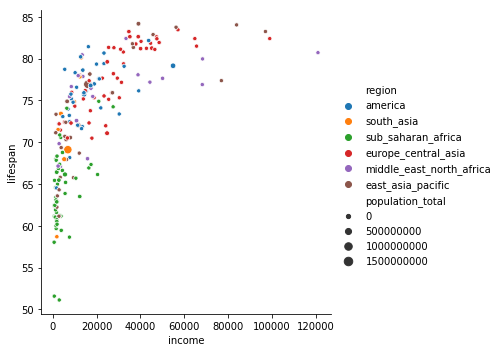

In [41]:
sns.relplot(x='income', y='lifespan', hue='region', size='population_total', data=now);

** Analyze Outliers **

In [0]:
# sns.relplot(x='income', y='lifespan', hue='region', sizes='population_total', data=now);

In [57]:
now[now['income'] > 80000]

,year,income,lifespan,population_total,country,region
22910,2018,99034,82.39,590321,Luxembourg,europe_central_asia
23348,2018,97057,83.24,632418,"Macao, China",east_asia_pacific
31498,2018,121033,80.71,2694849,Qatar,middle_east_north_africa
33031,2018,83888,84.03,5791901,Singapore,east_asia_pacific


In [59]:
# Macao is considered a country

entities[entities.name=='Macao, China'].T

,145
country,mac
alt_5,MACAU SPECIAL ADMINISTRATIVE REGION OF CHINA
alternative_1,Macau
alternative_2,Macao
alternative_3,"China, Macao SAR"
alternative_4_cdiac,Macau
arb1,"Macao SAR, China"
arb2,NaN
arb3,NaN
arb4,NaN


In [60]:
qatar = now[now['country']=='Qatar']
qatar.income

31498    121033
Name: income, dtype: int64

In [61]:
qatar.income.values

array([121033])

In [62]:
qatar.income.values[0]

121033

In [0]:
qatar_income = qatar.income.values[0]
qatar_lifespan = qatar.lifespan.values[0]

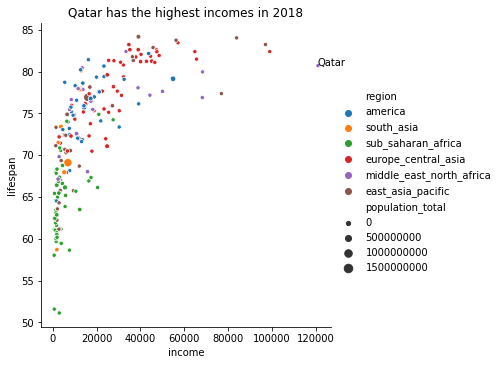

In [66]:
sns.relplot(x="income", y="lifespan", hue='region', size='population_total', data=now)

plt.text(x=qatar_income, y=qatar_lifespan, s='Qatar')
plt.title('Qatar has the highest incomes in 2018');

**Plot Multiple Years**

In [69]:
years = [1818, 1918, 2018]

centuries = df[df.year.isin(years)]

centuries.sample(5)

,year,income,lifespan,population_total,country,region
26480,1818,351,30.30,737000,Malawi,sub_saharan_africa
11966,2018,29457,77.66,1306788,Estonia,europe_central_asia
25147,2018,37938,81.75,432089,Malta,europe_central_asia
31517,1818,817,35.70,6293216,Romania,europe_central_asia
38306,1818,998,28.30,2010991,Taiwan,east_asia_pacific


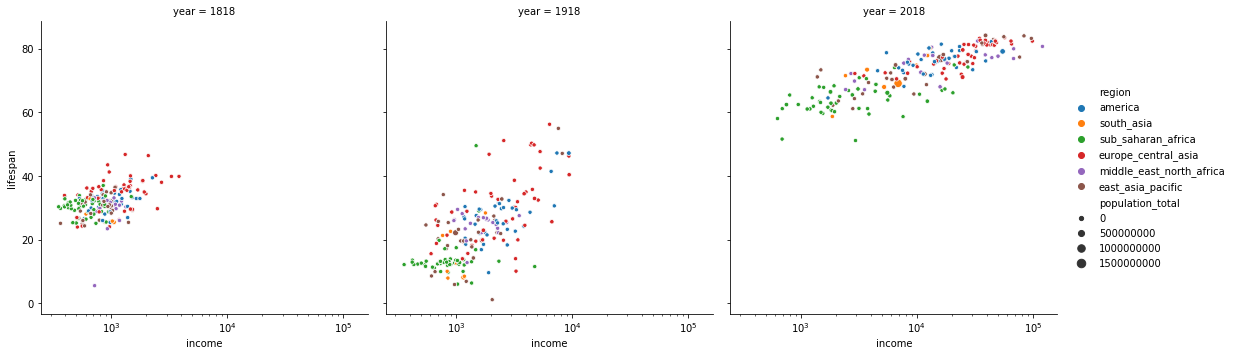

In [71]:
sns.relplot(x="income", y="lifespan", hue='region', size='population_total',
            col='year', data=centuries)

plt.xscale('log');

In [72]:
# Consistent number of countries per year?

centuries.groupby('year').country.count()

year
1818    190
1918    190
2018    188
Name: country, dtype: int64

In [73]:
years_per_country = centuries.groupby('country').year.count()
years_per_country[years_per_country < 3]

country
Greenland    2
Taiwan       2
Name: year, dtype: int64

**Point Out Story**

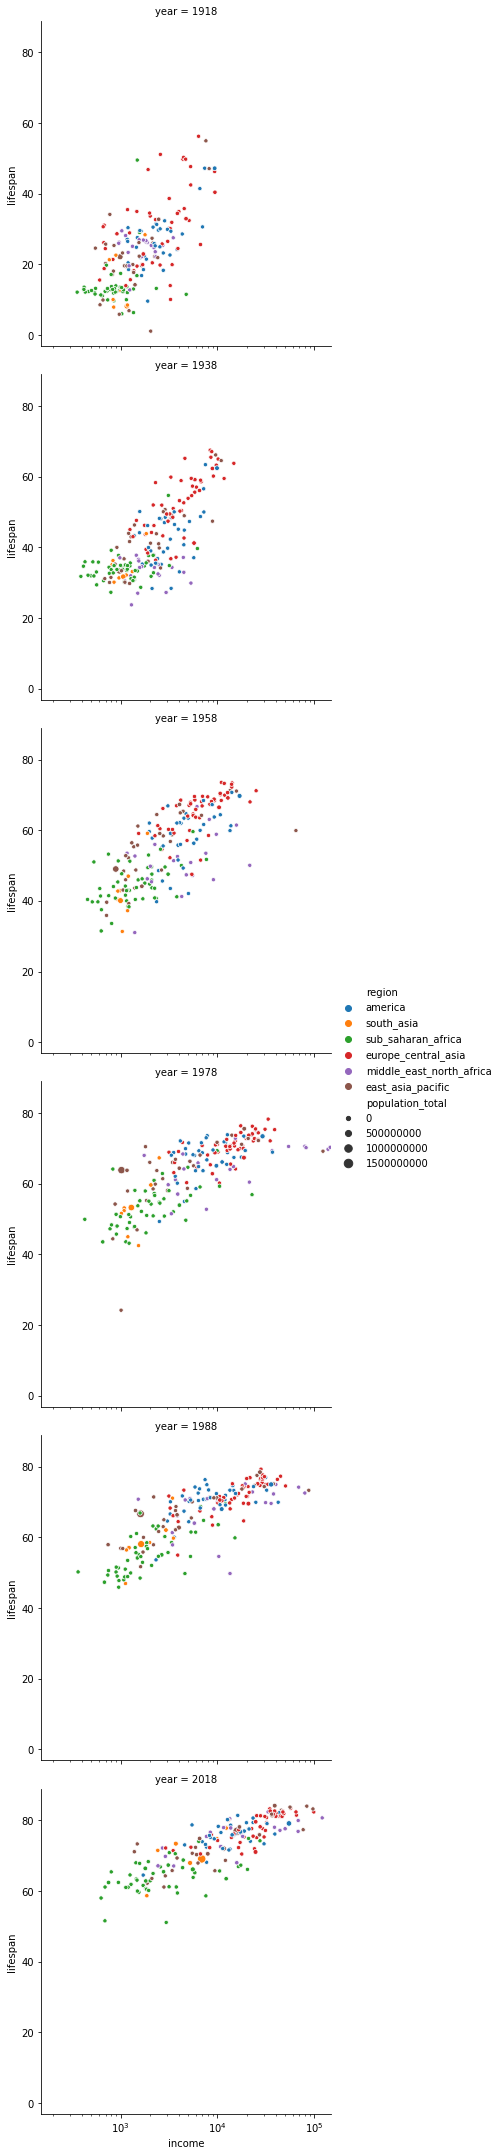

In [75]:
years = [1918, 1938, 1958, 1978, 1988, 2018]

subset = df[df.year.isin(years)]

sns.relplot(x='income', y='lifespan', hue='region', size='population_total',
           row='year', data=subset)

plt.xscale('log')
plt.xlim((150, 150000));

In [76]:
years

[1918, 1938, 1958, 1978, 1988, 2018]

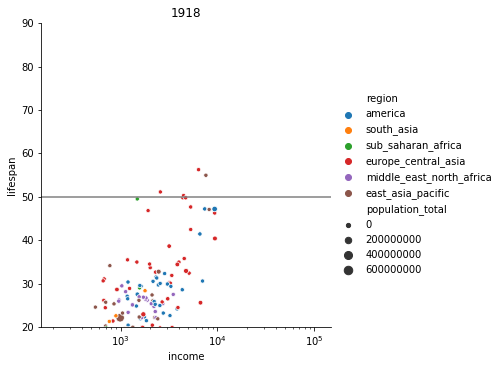

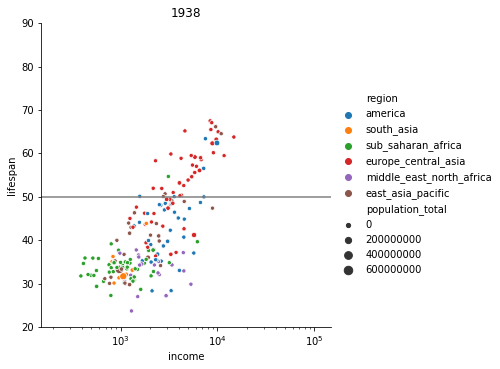

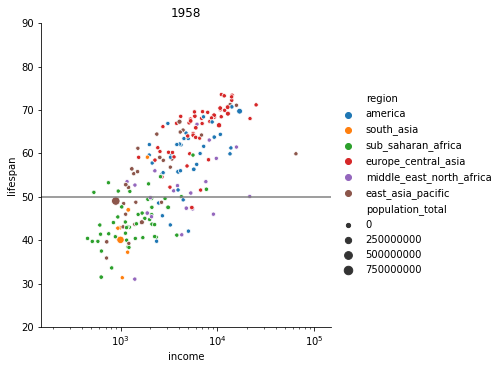

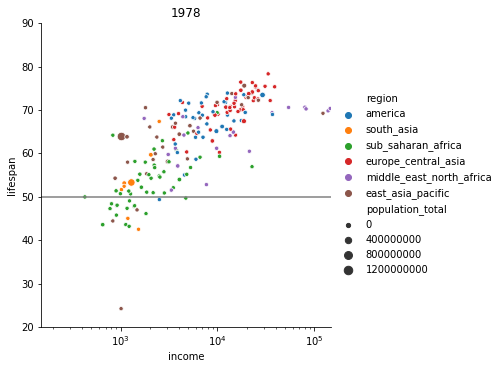

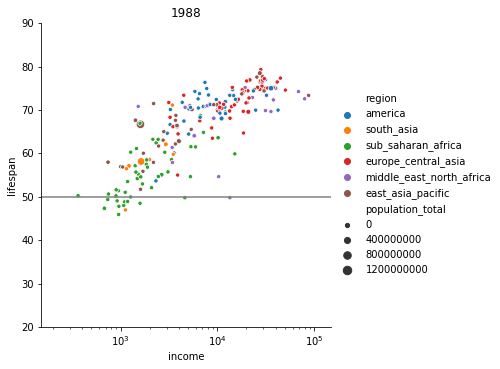

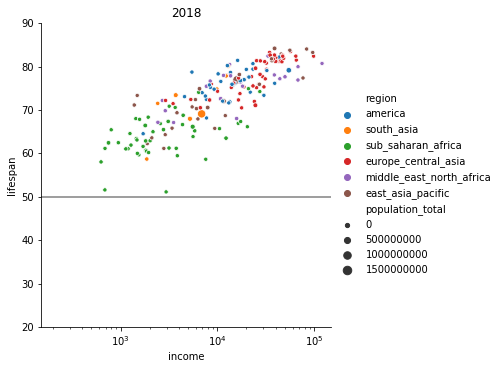

In [77]:
for year in years:
  

  sns.relplot(x='income', y='lifespan', hue='region', size='population_total',
            data=df[df.year==year])

  plt.xscale('log')
  plt.xlim((150, 150000));
  plt.ylim((20, 90))
  plt.title(year)
  plt.axhline(y=50, color='grey');

In [78]:
df[(df.year==1918) & (df.lifespan >= 50)]

,year,income,lifespan,population_total,country,region
1917,1918,7610,54.95,5066003,Australia,east_asia_pacific
10333,1918,6393,56.24,3165276,Denmark,europe_central_asia
18211,1918,2576,51.11,115504,Iceland,europe_central_asia
28113,1918,4479,50.28,2576646,Norway,europe_central_asia


In [79]:
df[(df.year==2018) & (df.lifespan <= 50)]

,year,income,lifespan,population_total,country,region


**Today no countries with lifespans below 50 years**

**Interactivity**

# Assignment Exploring Gapminder


**Please skip to the bottom for the plots and rationale for my plots.**

In [42]:
df.head()

,year,income,lifespan,population_total,country,region
0,1800,833,34.42,19286,Aruba,america
1,1801,833,34.42,19286,Aruba,america
2,1802,833,34.42,19286,Aruba,america
3,1803,833,34.42,19286,Aruba,america
4,1804,833,34.42,19286,Aruba,america


In [43]:
df.shape

(41790, 6)

In [44]:
years = [1818, 1918, 2018]

centuries_1 = df[df['year'].isin(years)]

centuries_1.head()

,year,income,lifespan,population_total,country,region
18,1818,835,34.42,19462,Aruba,america
118,1918,1765,22.32,32202,Aruba,america
218,2018,39219,76.14,105670,Aruba,america
237,1818,604,28.03,3308390,Afghanistan,south_asia
337,1918,849,7.89,5704092,Afghanistan,south_asia


In [56]:
print("Number of unique countries:", len(centuries_1['country'].unique()))

Number of unique countries: 190


In [50]:
centuries_1.shape

(568, 6)

In [0]:
pd.options.display.float_format = '{:.2f}'.format

In [58]:
centuries_1['population_total'].describe()

count          568.00
mean      18456229.98
std       90761207.36
min           2207.00
25%         431849.25
50%        2125373.00
75%        8835956.00
max     1415045928.00
Name: population_total, dtype: float64

In [61]:
df['population_total'].describe()

count        41790.00
mean      13325504.93
std       65023488.34
min           2128.00
25%         376028.25
50%        1915244.00
75%        6260146.75
max     1415045928.00
Name: population_total, dtype: float64

In [81]:
# The mean population totals for the year 1918 = 9709630.25

df[df['year']==1818].describe()

,year,income,lifespan,population_total
count,190.00,190.00,190.00,190.00
mean,1818.00,958.64,31.64,5443461.50
std,0.00,501.87,4.60,30133081.50
min,1818.00,351.00,5.50,2207.00
25%,1818.00,616.25,29.12,140473.00
50%,1818.00,857.50,31.80,755085.00
75%,1818.00,1107.50,34.05,2176978.25
max,1818.00,3829.00,46.75,374161494.00


In [0]:
# df[(df.year==1918) & (df.lifespan >= 50)]

In [102]:
pop_above_mean_1818 = df[(df['year']==1818) & (df['population_total'] > 755085.00)]
pop_above_mean_1818.head()

,year,income,lifespan,population_total,country,region
237,1818,604,28.03,3308390,Afghanistan,south_asia
456,1818,668,26.98,1586896,Angola,sub_saharan_africa
2036,1818,1986,34.40,3366878,Austria,europe_central_asia
2255,1818,778,29.17,894149,Azerbaijan,europe_central_asia
2474,1818,425,31.50,911278,Burundi,sub_saharan_africa


In [100]:
pop_above_mean_1818.describe()

,year,income,lifespan,population_total
count,95.00,95.00,95.00,95.00
mean,1818.00,1072.63,31.90,10657742.86
std,0.00,618.69,5.41,42079231.20
min,1818.00,395.00,5.50,763170.00
25%,1818.00,642.00,29.04,1251541.50
50%,1818.00,906.00,31.60,2180375.00
75%,1818.00,1306.50,35.65,5086240.00
max,1818.00,3829.00,46.75,374161494.00


In [101]:
pop_below_mean_1818 = df[(df['year']==1818) & (df['population_total'] < 755085.00)]
pop_below_mean_1818.head()

,year,income,lifespan,population_total,country,region
18,1818,835,34.42,19462,Aruba,america
675,1818,669,35.40,435384,Albania,europe_central_asia
941,1818,1067,30.70,40153,United Arab Emirates,middle_east_north_africa
1160,1818,1511,33.20,557637,Argentina,america
1379,1818,515,34.00,419962,Armenia,europe_central_asia


In [103]:
pop_below_mean_1818.describe()

,year,income,lifespan,population_total
count,95.00,95.00,95.00,95.00
mean,1818.00,844.64,31.37,229180.14
std,0.00,312.06,3.62,217164.42
min,1818.00,351.00,23.94,2207.00
25%,1818.00,601.50,29.15,56856.50
50%,1818.00,835.00,31.90,139941.00
75%,1818.00,997.00,33.37,379301.50
max,1818.00,1762.00,43.48,747000.00


In [90]:
df[df['year']==1918].describe()

,year,income,lifespan,population_total
count,190.00,190.00,190.00,190.00
mean,1918.00,2033.64,23.00,9709630.25
std,0.00,1767.78,10.84,40183168.69
min,1918.00,356.00,1.09,18185.00
25%,1918.00,893.50,13.21,403682.00
50%,1918.00,1433.00,22.18,1880693.50
75%,1918.00,2408.00,28.98,5076364.25
max,1918.00,9434.00,56.24,462444535.00


In [93]:
pop_above_mean_1918 = df[(df['year']==1918) & (df['population_total'] > 1880693.50)]
pop_above_mean_1918.head()

,year,income,lifespan,population_total,country,region
337,1918,849,7.89,5704092,Afghanistan,south_asia
556,1918,1174,12.01,3487015,Angola,sub_saharan_africa
1260,1918,6595,41.43,8530833,Argentina,america
1917,1918,7610,54.95,5066003,Australia,east_asia_pacific
2136,1918,5103,32.41,6643721,Austria,europe_central_asia


In [94]:
pop_above_mean_1918.describe()

,year,income,lifespan,population_total
count,95.00,95.00,95.00,95.00
mean,1918.00,2428.23,24.35,18831279.03
std,0.00,2102.24,11.81,55480371.30
min,1918.00,418.00,5.99,1919380.00
25%,1918.00,997.50,13.75,3039878.50
50%,1918.00,1556.00,23.21,5078655.00
75%,1918.00,3259.50,30.37,11498267.50
max,1918.00,9434.00,56.24,462444535.00


In [95]:
pop_below_mean_1918 = df[(df['year']==1918) & (df['population_total'] < 1880693.50)]
pop_below_mean_1918.head()

,year,income,lifespan,population_total,country,region
118,1918,1765,22.32,32202,Aruba,america
775,1918,1478,19.49,953764,Albania,europe_central_asia
1041,1918,1885,26.17,53790,United Arab Emirates,middle_east_north_africa
1479,1918,671,26.14,1006536,Armenia,europe_central_asia
1698,1918,1604,21.90,30391,Antigua and Barbuda,america


In [97]:
pop_below_mean_1918.describe()

,year,income,lifespan,population_total
count,95.00,95.00,95.00,95.00
mean,1918.00,1639.04,21.65,587981.47
std,0.00,1244.66,9.66,548408.80
min,1918.00,356.00,1.09,18185.00
25%,1918.00,832.50,13.09,109398.50
50%,1918.00,1222.00,21.88,402582.00
75%,1918.00,2218.00,26.79,946874.50
max,1918.00,8223.00,51.11,1842007.00


# **The following plots show an interesting anomaly  where  it seems larger populations tend to cluster lifespans for many regions. **

The first two plots are for the year 1818, where the first plot represents regions with populations below the 1818 median, and the second plot represents regions with populations above the 1818 median.  

The third and fourth plots are for the year 1918, where the first plot again represents populatoiins below the 1918 median, and the second plot represents populations above the 1919 median.

### Taken together, these plots lend support to the idea that larger populations require greater resources for sustainability and that might in turn affect life spans.  Hence, we see greater variability for those countries under the median for 1818.

### Population seems to matter less in 1919, where it seems there's little difference between high-population countries and low population countries perhaps due to the effects of Influenza Epidemic, and WWI.


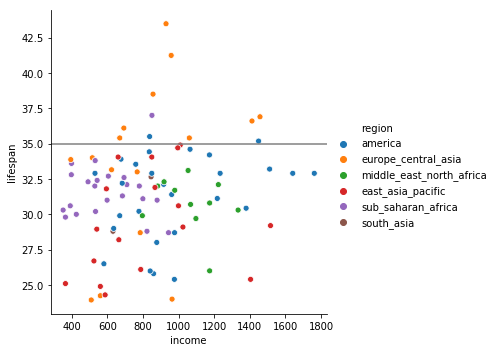

In [116]:
# population below mean for 1818

sns.relplot(x='income', y='lifespan', hue='region', data=pop_below_mean_1818)

plt.axhline(y=35, color='grey');

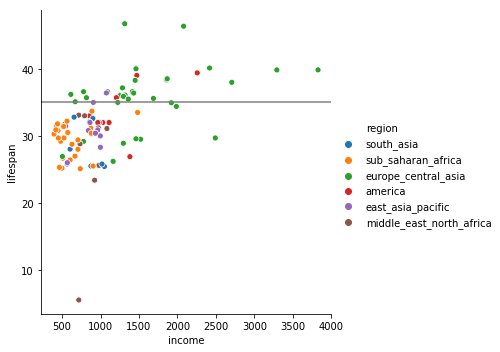

In [117]:
# population above mean for 1818

sns.relplot(x='income', y='lifespan', hue='region', data=pop_above_mean_1818);

plt.axhline(y=35, color='grey');

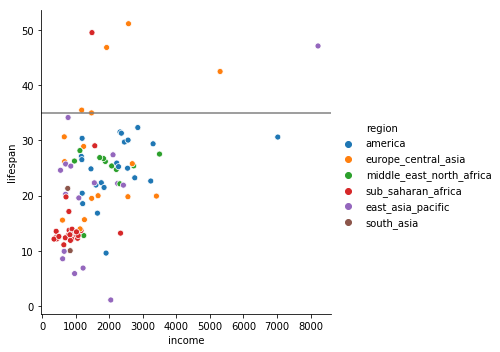

In [118]:
# population below the mean in 1918

sns.relplot(x='income', y='lifespan', hue='region', data=pop_below_mean_1918);

plt.axhline(y=35, color='grey');

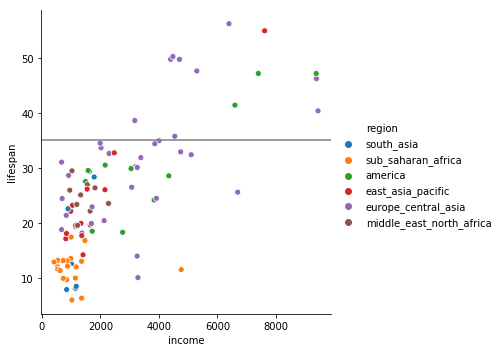

In [119]:
# population above the mean in 1918

sns.relplot(x='income', y='lifespan', hue='region', data=pop_above_mean_1918);

plt.axhline(y=35, color='grey');

In [0]:
"""
sns.relplot(x='income', y='lifespan', hue='region', size='population_total', data=now);

years = [1818, 1918, 2018]

centuries = df[df.year.isin(years)]

centuries.sample(5)
"""